In [56]:
import numpy as np
import matplotlib.pyplot as plt
from unyt import boltzmann_constant_cgs
parsec_in_cm = 3.086e18
gamma = 5./3.

In [200]:
timestep = 33
timestep_str = f"{timestep:05d}"
z_kpc, heatEdot_cgs = np.loadtxt("turbHeat_avg" + timestep_str + ".csv", unpack=True)
z_kpc, coolEdot_cgs = np.loadtxt("coolEdot_avg" + timestep_str + ".csv", unpack=True)
z_kpc, heatFlux_cgs = np.loadtxt("heatFlux_avg" + timestep_str + ".csv", unpack=True)
z_kpc, massFlux_cgs = np.loadtxt("massFlux_avg" + timestep_str + ".csv", unpack=True)
z_kpc, T_avg = np.loadtxt("T_avg" + timestep_str + ".csv", unpack=True)

In [201]:
# this is time-averaged in Wang, Oh, & Ruzkowski!
c_v = (1 /(gamma - 1.)) * boltzmann_constant_cgs
heatFlux = c_v * heatFlux_cgs
convFlux = c_v * (heatFlux_cgs - massFlux_cgs * T_avg)
z_kpc_cgs = z_kpc * (1.0e3 * parsec_in_cm)
z_kpc_diff = z_kpc[:-1] + 0.5 * np.diff(z_kpc)
#divF_fd = -np.diff(convFlux) / np.diff(z_kpc_cgs)
#divHeat = -np.diff(heatFlux) / np.diff(z_kpc_cgs)
#plt.plot(z_kpc_diff, divHeat, label="total heat diffusion rate")

import scipy.signal
divF = -scipy.signal.savgol_filter(convFlux, 5, 2, 1, delta=np.diff(z_kpc_cgs)[0])

(0.0, 100.0)

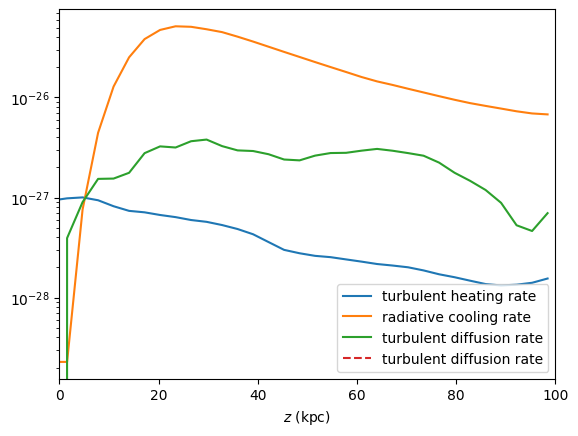

In [202]:
plt.plot(z_kpc, heatEdot_cgs, label="turbulent heating rate")
plt.plot(z_kpc, -coolEdot_cgs, label="radiative cooling rate")
plt.plot(z_kpc, divF, label="turbulent diffusion rate")
plt.plot(z_kpc, -divF, '--', label="turbulent diffusion rate")
plt.legend(loc='lower right')
plt.yscale('log')
plt.xlabel(r"$z$ (kpc)")
plt.xlim(0, 100)

(0.001, 100.0)

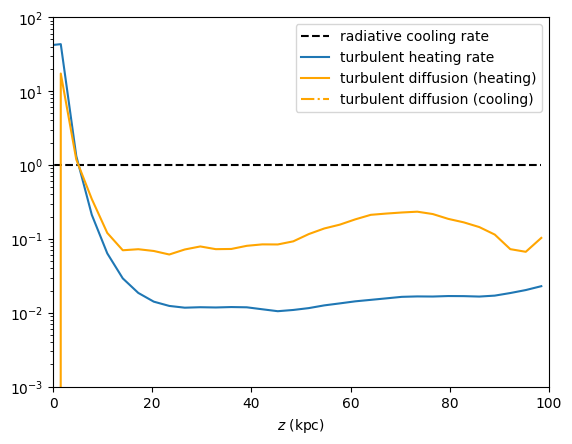

In [203]:
plt.plot(z_kpc, np.ones_like(coolEdot_cgs), '--', color='black', label="radiative cooling rate")
plt.plot(z_kpc, heatEdot_cgs / (-coolEdot_cgs), label="turbulent heating rate")
plt.plot(z_kpc, divF / (-coolEdot_cgs), color='orange', label="turbulent diffusion (heating)")
plt.plot(z_kpc, -divF / (-coolEdot_cgs), '-.', color='orange', label="turbulent diffusion (cooling)")
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel(r"$z$ (kpc)")
plt.xlim(0, 100)
plt.ylim(1e-3, 1e2)